In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import os
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [53]:
import pandas as pd

file_path = '/content/drive/MyDrive/solar_energy/parsed_data.jsons'

df1 = pd.read_json(file_path, lines=True)
df1 = df1.drop('id', axis = 1)
num_duplicates = df1.duplicated().sum()
#print(f"Total number of duplicates: {num_duplicates}")

df1.head()


,province,sun_hour,rainy_day,monthly_amount_rain,fastest_wind,average_temperature,highest_snow
0,ERZURUM,6.97,121.62,429.3,30.6,5.75,110
1,ESKISEHIR,6.57,72.58,355.9,28.3,10.97,30
2,MANISA,6.49,86.21,743.8,42.5,16.89,44
3,CANKIRI,6.32,106.08,416.0,42.0,11.38,92
4,MALATYA,7.62,85.74,383.6,38.1,13.72,67


In [38]:
df1.shape

(81, 7)

In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   province             81 non-null     object 
 1   sun_hour             81 non-null     float64
 2   rainy_day            81 non-null     float64
 3   monthly_amount_rain  81 non-null     float64
 4   fastest_wind         81 non-null     object 
 5   average_temperature  81 non-null     float64
 6   highest_snow         81 non-null     int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 4.6+ KB


In [40]:
import pandas as pd

file_path = '/content/drive/MyDrive/solar_energy/radiation.csv'

df = pd.read_csv(file_path)

num_duplicates = df.duplicated().sum()
print(f"Total number of duplicates: {num_duplicates}")

Total number of duplicates: 0


In [41]:
df1.dtypes

province                object
sun_hour               float64
rainy_day              float64
monthly_amount_rain    float64
fastest_wind            object
average_temperature    float64
highest_snow             int64
dtype: object

In [42]:
import json
import pandas as pd


column_to_add = df.iloc[:, 4]

# Add the column to df1
df1['Radiation_amount'] = column_to_add

# Save the updated dataset2 with the new column
df.to_csv('merged_dataset.csv', index=False)
df1


,province,sun_hour,rainy_day,monthly_amount_rain,fastest_wind,average_temperature,highest_snow,Radiation_amount
0,ERZURUM,6.97,121.62,429.3,30.6,5.75,110,1.393
1,ESKISEHIR,6.57,72.58,355.9,28.3,10.97,30,1.472
2,MANISA,6.49,86.21,743.8,42.5,16.89,44,1.486
3,CANKIRI,6.32,106.08,416.0,42.0,11.38,92,1.432
4,MALATYA,7.62,85.74,383.6,38.1,13.72,67,1.609
...,...,...,...,...,...,...,...,...
76,KARABUK,0.00,101.47,487.5,35.5,13.59,38,1.369
77,OSMANIYE,4.74,78.22,824.1,43.7,18.68,-1,1.555
78,ERZINCAN,6.56,102.07,374.0,39.5,10.92,74,1.555
79,BARTIN,5.84,140.70,1053.1,41.7,12.84,109,1.307


In [43]:
df1.describe()

,sun_hour,rainy_day,monthly_amount_rain,average_temperature,highest_snow,Radiation_amount
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,6.206914,104.678395,641.425926,13.171852,76.814815,1.495963
std,1.733334,22.819604,296.987500,3.274287,56.303222,0.104365
min,0.000000,66.670000,258.700000,3.690000,-1.000000,1.303000
25%,5.650000,86.210000,434.300000,11.230000,41.000000,1.409000
50%,6.570000,102.070000,567.600000,13.280000,63.000000,1.509000
75%,7.320000,116.640000,721.600000,15.170000,93.000000,1.588000
max,8.230000,172.630000,2302.000000,19.270000,285.000000,1.660000


column descriptions

sun _hour = a calculation of the average passage of time based on the position of the Sun in the sky

rainy_day = number of days which the weather is rainy

monthly_amount_rain = amount of rain in a month in terms of (mm)

average_temperature = annually (°C)

highest_snow = greatest snow depth (cm)

radiation_amount = potantiel of solar energy (annually) (kWh/m^2)


In [44]:

regions = [['ADANA', 'ANTALYA', 'BURDUR', 'HATAY', 'ISPARTA','MERSIN', 'OSMANIYE', 'K.MARAS'], 
           ['AGRI', 'ARDAHAN', 'BINGOL', 'BITLIS', 'ELAZIG', 'ERZINCAN', 'ERZURUM', 'HAKKARI', 'IGDIR', 'KARS', 'MALATYA', 'MUS', 'TUNCELI', 'VAN'], 
           ['IZMIR',"MANISA","AYDIN","USAK","KUTAHYA","AFYONKARAHISAR","DENIZLI","MUGLA","CANAKKALE","BALIKESIR","BURSA"],
           ["ADIYAMAN", "BATMAN", "DIYARBAKIR", "GAZIANTEP", "KILIS", "MARDIN", "SANLIURFA", "SIIRT", "SIRNAK"],
           ["AKSARAY","ANKARA","CANKIRI","ESKISEHIR","KARAMAN","KAYSERİ","KIRIKKALE","KIRSEHIR","KONYA","NEVSEHIR","NIGDE","SIVAS","YOZGAT"],
           ["AMASYA", "ARTVIN", "BOLU", "GIRESUN", "GUMUSHANE", "KASTAMONU", "ORDU", "RIZE", "SAMSUN", "SINOP", "TOKAT", "TRABZON", "ZONGULDAK", "CORUM", "BAYBURT"],
           ["YALOVA", "TEKIRDAG", "SAKARYA", "KOCAELI", "KIRKLARELI","ISTANBUL", "EDIRNE", "CANAKKALE","BURSA", "BILECIK", "BALIKESIR"]]
            
# Use the 'isin()' method with boolean indexing to select the desired rows

akdeniz_df = df1[df1['province'].isin(regions[0])]
dogu_anadolu_df = df1[df1['province'].isin(regions[1])]
ege_df = df1[df1['province'].isin(regions[2])]
guneydogu_anadolu_df = df1[df1['province'].isin(regions[3])]
ıc_anadolu_df = df1[df1['province'].isin(regions[4])]
karadeniz_df = df1[df1['province'].isin(regions[5])]
marmara_df = df1[df1['province'].isin(regions[6])]

  

means_akdeniz = akdeniz_df.mean(numeric_only=True).to_frame(name='Mean').transpose()
means_dogu_anadolu = dogu_anadolu_df.mean(numeric_only=True).to_frame(name='Mean').transpose()
means_ege = ege_df.mean(numeric_only=True).to_frame(name='Mean').transpose()
means_guneydogu_anadolu = guneydogu_anadolu_df.mean(numeric_only=True).to_frame(name='Mean').transpose()
means_ıc_anadolu = ıc_anadolu_df.mean(numeric_only=True).to_frame(name='Mean').transpose()
means_karadeniz = karadeniz_df.mean(numeric_only=True).to_frame(name='Mean').transpose()
means_marmara = marmara_df.mean(numeric_only = True).to_frame(name='Mean').transpose()


combined_df = pd.concat([means_akdeniz, means_dogu_anadolu, means_ege, means_guneydogu_anadolu, means_ıc_anadolu, means_karadeniz, means_marmara], ignore_index=True)

combined_df = combined_df.round(3)
combined_df

,sun_hour,rainy_day,monthly_amount_rain,average_temperature,highest_snow,Radiation_amount
0,7.068,81.129,754.287,17.075,21.125,1.596
1,6.279,107.712,591.464,9.577,149.500,1.555
2,6.907,93.937,678.073,14.838,48.545,1.499
3,7.618,82.431,592.011,16.432,63.889,1.574
4,7.046,95.687,393.967,11.212,63.750,1.532
5,4.736,133.586,804.207,12.481,91.267,1.398
6,5.940,108.763,664.530,14.245,58.200,1.359


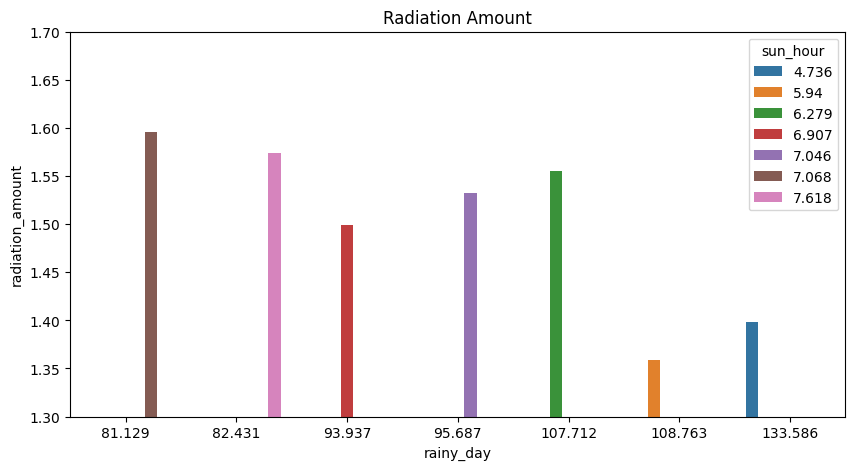

In [45]:
# Create a new figure with a size of (10,5)
plt.figure(figsize=(10, 5))

# Create the bar plot

# Create the bar plot using the merged dataset
sns.barplot(data= combined_df, x='rainy_day', y= 'Radiation_amount', hue='sun_hour')

# Set the plot title and labels

plt.title('Radiation Amount')
plt.xlabel('rainy_day')
plt.ylabel('radiation_amount')
plt.ylim(1.3,1.7)
# Show the plot
plt.show()

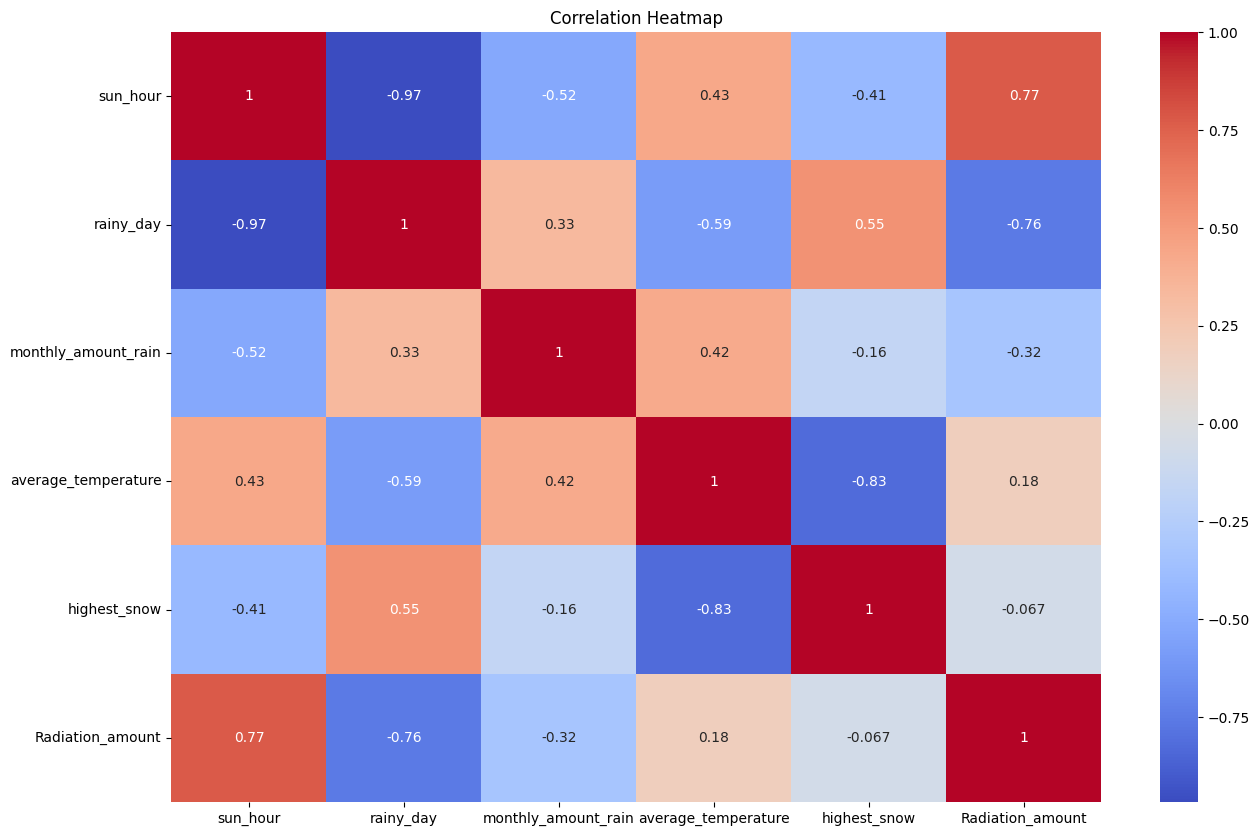

In [52]:
# Calculate the correlation matrix
correlation_matrix = combined_df.corr()

# Create a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Add title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

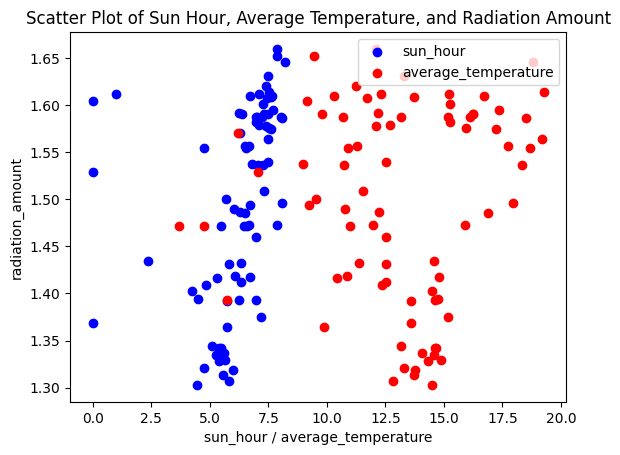

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with the given data

# Create a scatter plot
plt.scatter(df1['sun_hour'], df1['Radiation_amount'], color='blue', label='sun_hour')
plt.scatter(df1['average_temperature'], df1['Radiation_amount'], color='red', label='average_temperature')

# Add labels and title
plt.xlabel('sun_hour / average_temperature')
plt.ylabel('radiation_amount')
plt.title('Scatter Plot of Sun Hour, Average Temperature, and Radiation Amount')

# Add a legend
plt.legend()

# Display the plot
plt.show()

<ipython-input-48-9776f70275be>:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set3', len(regions))


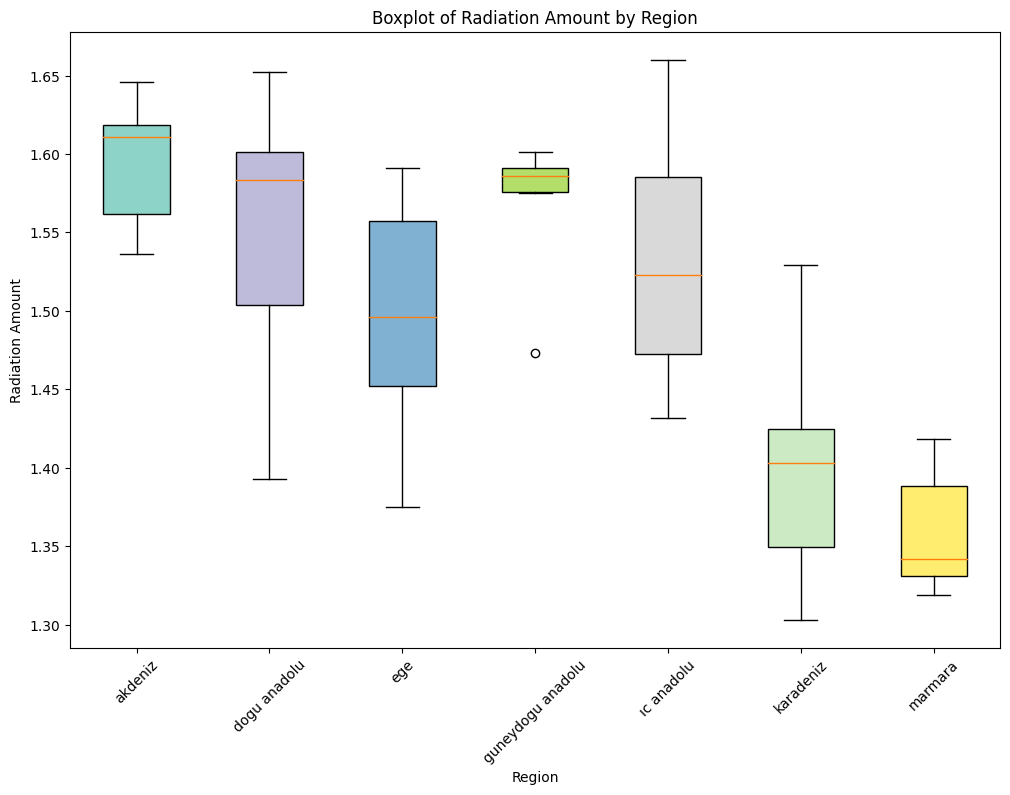

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have your dataframe named 'df' with columns 'Region' and 'Radiation Amount'
# Also assuming you have the list of regions named 'regions'

# Set the figure size
plt.figure(figsize=(12, 8))

# Create an empty list to store the radiation amount data for each region
region_data = []
list_values = ['akdeniz', 'dogu anadolu', 'ege','guneydogu anadolu','ıc anadolu','karadeniz','marmara']

# Define a colormap with enough colors for the number of regions
cmap = plt.cm.get_cmap('Set3', len(regions))

# Iterate over each region
for region in regions:
    subset = df1[df1['province'].isin(region)]
    region_data.append(subset['Radiation_amount'])

# Create the boxplot with all regions in a row, assigning different colors to each boxplot
boxplot = plt.boxplot(region_data, labels=[list_values[i] for i in range(len(regions))], patch_artist=True)

# Set the facecolor of each boxplot using the colormap
for i, patch in enumerate(boxplot['boxes']):
    patch.set_facecolor(cmap(i))

# Set plot labels and title
plt.xlabel('Region')
plt.ylabel('Radiation Amount')
plt.title('Boxplot of Radiation Amount by Region')

# Rotate the x-axis labels for better visibility if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()


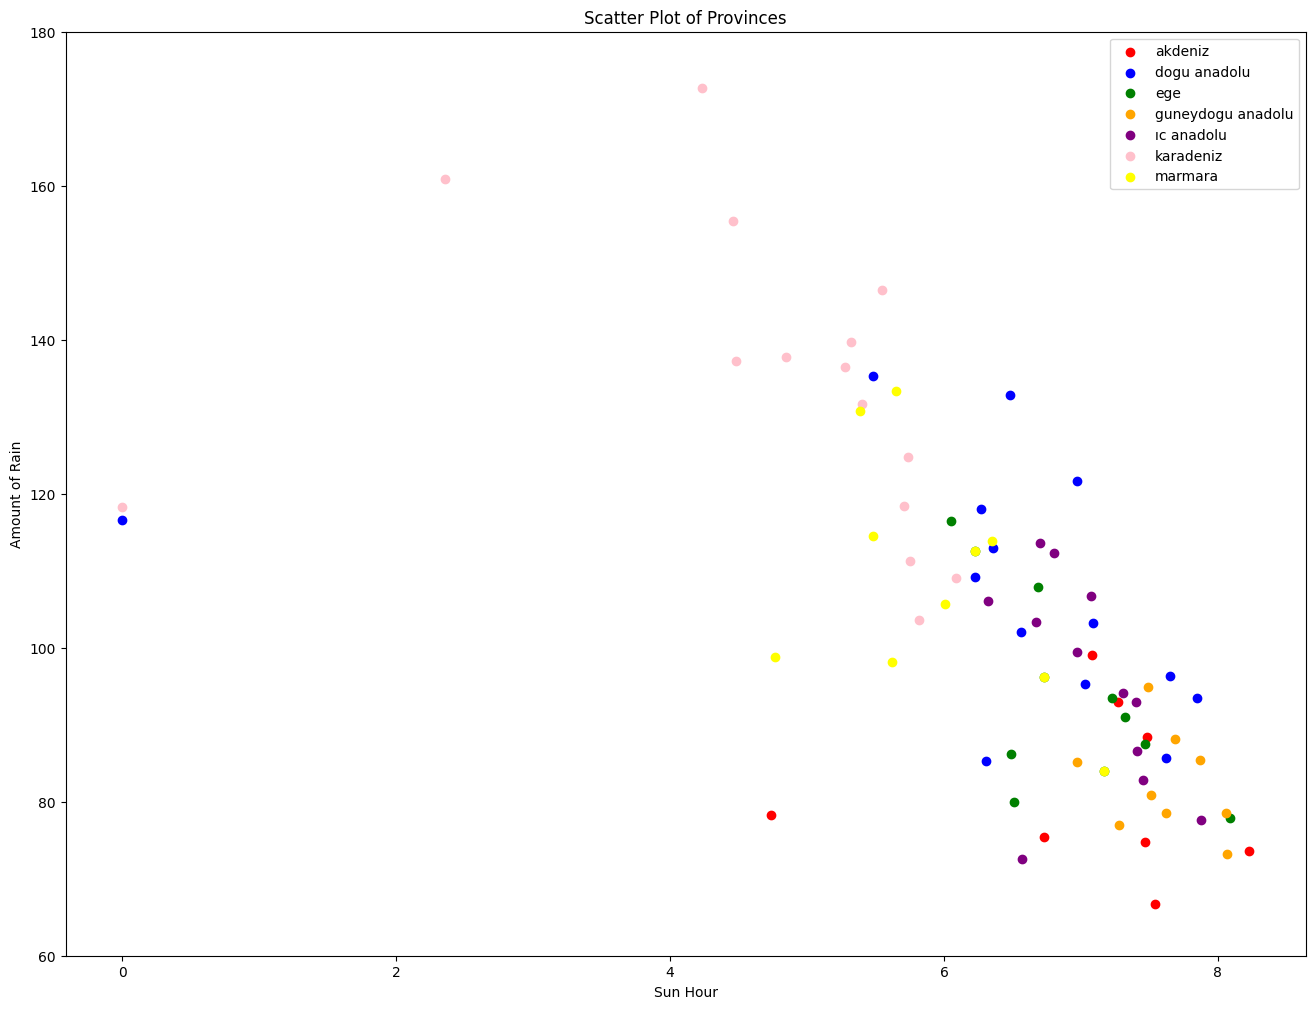

In [49]:
import matplotlib.pyplot as plt

# Assuming you have your dataframe named 'df' with columns 'province', 'sun_hour', and 'amount_of_rain'
plt.figure(figsize=(16,12))
# Define the colors for each list of provinces
list_colors = ['red', 'blue', 'green', 'orange', 'purple', 'pink', 'yellow']
list_values = ['akdeniz', 'dogu anadolu', 'ege','guneydogu anadolu','ıc anadolu','karadeniz','marmara']

# Iterate over each list of provinces
for i, province_list in enumerate(regions):
    # Get the subset of data for the current province list
    subset = df1[df1['province'].isin(province_list)]
    
    x = subset['sun_hour']
  
    y = subset['rainy_day']
    
    # Scatter plot with different colors for each list of provinces
    plt.scatter(x, y, color=list_colors[i], label=list_values[i])

# Set plot labels and title
plt.xlabel('Sun Hour')
plt.ylabel('Amount of Rain')
plt.title('Scatter Plot of Provinces')

plt.yticks(np.arange(0,200, 20))

# Add a legend
plt.legend()
plt.xlim()
plt.ylim(60,180)
# Display the plot
plt.show()

In [50]:

from sklearn.model_selection import train_test_split
#combined_df2 = combined_df2.drop([0], axis = 0 )
df1 = df1.drop(['province'], axis = 1 )
features = df1.drop('Radiation_amount', axis=1).values

# Select the label column
labels = df1['Radiation_amount'].values

# Split the data into training and test datasets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
# Train a linear regression model and predict
### WRITE YOUR CODE ###


# Create the linear regression model
model = LinearRegression()
# Train the model
model.fit(train_features, train_labels)
#predict
labels_pred_train = model.predict(train_features)


# Calculate the Mean Squared Error (MSE) and R2 score on training data
### WRITE YOUR CODE ###

MSE_train = mean_squared_error(train_labels, labels_pred_train)
r2_train = r2_score(train_labels, labels_pred_train)

# Print the MSE and R2 score on training data
### WRITE YOUR CODE ###
print("Training MSE:", MSE_train)
print("Training R2 Score:", r2_train)

Training MSE: 0.0051511831172085226
Training R2 Score: 0.5086510305589436


In [51]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler


# Polynomial Regression or some other model 
### WRITE YOUR CODE ###


model_poly = make_pipeline(PolynomialFeatures(2), LinearRegression())
model_poly.fit(train_features, train_labels)
labels_poly_pred = model_poly.predict(train_features)
MSE_poly = mean_squared_error(train_labels, labels_poly_pred)
r2_poly = r2_score(train_labels, labels_poly_pred)


print("MSE of Polynomial Regression: ", MSE_poly)
#print("R2 Score of Polynomial Regression: ", r2_poly)


MSE of Polynomial Regression:  0.029979488569365775
